<a href="https://colab.research.google.com/github/1danjae1/Maritime-Data-Mining/blob/main/%ED%95%B4%EC%82%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D%20%EB%84%A4%EB%B2%88%EC%A7%B8%20%EA%B3%BC%EC%A0%9C%201%20%EA%B3%BC%EC%A0%9C%202%20%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# github의 자동차 생산 자료를 읽어들인다
path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path + 'vehicle_prod.csv'
df = pd.read_csv(file, index_col=0)

# 숫자형 열만 선택하여 합계(Total)와 평균(Average) 계산
sums = df.select_dtypes(np.number).sum().rename('Total')
avgs = df.select_dtypes(np.number).mean().rename('Average')

# Total과 Average를 데이터프레임으로 변환 후 기존 df와 연결
summary_df = pd.DataFrame([sums, avgs])
total_df = pd.concat([df, summary_df])

# 출력
total_df

,2007,2008,2009,2010,2011
China,7.71,7.950000,11.960000,15.84,16.330000
EU,19.02,17.710000,15.000000,16.70,17.480000
US,10.47,8.450000,5.580000,7.60,8.400000
Japan,10.87,10.830000,7.550000,9.09,7.880000
Korea,4.04,3.780000,3.450000,4.20,4.620000
Mexico,2.01,2.050000,1.500000,2.25,2.540000
Total,54.12,50.770000,45.040000,55.68,57.250000
Average,9.02,8.461667,7.506667,9.28,9.541667


최대풍속의 최대값    26.0
평균풍속의 최대값    14.9


<ipython-input-6-4ad17a129910>:35: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-4ad17a129910>:35: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-4ad17a129910>:35: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-4ad17a129910>:35: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-4ad17a129910>:35: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-4ad17a129910>:35: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-4ad17a129910>:35: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyt

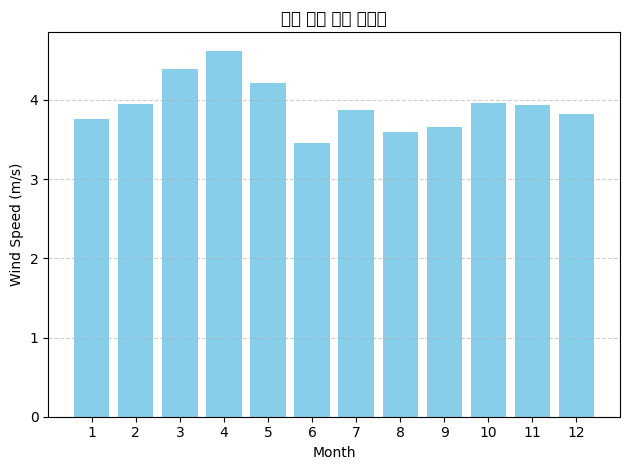

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일 경로
path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path + 'weather.csv'

# 데이터 불러오기
weather = pd.read_csv(weather_file, encoding='CP949')

# 날짜 컬럼을 datetime 타입으로 변환 후 month 추출
weather['일시'] = pd.to_datetime(weather['일시'], errors='coerce')
weather = weather.dropna(subset=['일시'])  # 일시가 NaT인 행 제거
weather['month'] = weather['일시'].dt.month

# 최대풍속과 평균풍속의 최대값 출력
print('최대풍속의 최대값   ', weather['최대풍속'].max())
print('평균풍속의 최대값   ', weather['평균풍속'].max())

# 월별 평균 풍속 계산
monthly_wind = [
    weather[weather['month'] == i]['평균풍속'].mean()
    for i in range(1, 13)
]

# 시각화
months = np.arange(1, 13)
plt.bar(months, monthly_wind, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('월별 평균 풍속 그래프')
plt.xticks(months)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
